In [1]:
import model
import torch

In [2]:
from dataloader.cifar10 import CIFAR10
from torchvision import transforms
import matplotlib.pyplot as plt

In [3]:
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
    ])

In [76]:
#preprocess = preprocess()
trainset = CIFAR10(root='../datasets', train=True, download=True, transform=preprocess)

Files already downloaded and verified


In [77]:
len(trainset)

50000

In [78]:
trainloader_t = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

In [79]:
d_t = iter(trainloader_t)

In [8]:
d

In [80]:
image, label = d_t.next()

In [83]:
pred_t = model(image)

In [85]:
pred_t

tensor([[ 0.1371,  0.1929, -0.0529, -0.1005, -0.1369,  0.1537,  0.0378, -0.1246,
         -0.0607, -0.2127],
        [ 0.0453, -0.0644, -0.1951,  0.0437, -0.2387,  0.0851, -0.0971,  0.1430,
         -0.0583, -0.0989],
        [-0.0148,  0.3270, -0.0692, -0.1425, -0.2668, -0.1526,  0.3365, -0.1713,
         -0.1324, -0.1426],
        [ 0.1140,  0.7920,  0.0214,  0.1340, -0.1386, -0.1405,  0.6790, -0.3944,
         -0.1215,  0.0628]], grad_fn=<AddmmBackward>)

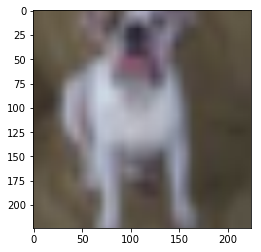

In [47]:
img = image[1]
npimg = img.numpy()
import numpy as np
plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [50]:
import random

In [76]:
random.randrange(0,4)

2

In [83]:
for i in range(10):
    print(random.randrange(0,4))

1
3
1
0
3
1
1
1
3
3


In [129]:
import configparser
config = configparser.ConfigParser(allow_no_value=True)
config.read('configs/field.ini')

['configs/field.ini']

In [130]:
config.items('EXP')

[('root', ''),
 ('seed', ''),
 ('exp_name', ''),
 ('batch_size', ''),
 ('model', ''),
 ('epochs', ''),
 ('lr', ''),
 ('val_freq', ''),
 ('worker', ''),
 ('gpus', ''),
 ('unsuper', '')]

In [137]:
from CustomConfigparser import CustomConfigparser

In [138]:
CustomConfigparser('configs/filed.ini', 'configs/resnet_50.ini')

{}

In [5]:

import configparser

In [18]:
def CustomConfigparser(field, config):
    F_config = configparser.ConfigParser(allow_no_value=True)
    T_config = configparser.ConfigParser(allow_no_value=True)
    F_config.read(field)
    T_config.read(config)
    sections = F_config.sections()
    r = {}
    for section in sections:
        items = F_config.items(section)
        sub_r = {}
        for ele in items:
            try :
                sub_r[ele[0]] = T_config[section][ele[0]]
            except Exception as e:
                sub_r[ele[0]] = None
        r[section]=sub_r
    return r

In [19]:
CustomConfigparser('configs/field.ini', 'configs/resnet_50.ini')

{'EXP': {'root': '../datasets',
  'seed': '777',
  'exp_name': 'resnet_50',
  'batch_size': '128',
  'model': 'resnet',
  'epochs': '100',
  'lr': '1e-3',
  'val_freq': '1',
  'worker': '4',
  'gpus': '0',
  'unsuper': 'false'},
 'DATASET': {'dataset': None,
  'autoaug': None,
  'resize': None,
  'hflip': None,
  'rot': None},
 'MODEL': {'depth': '50',
  'optim': 'adam',
  'scheduler': 'reducelr',
  'criterion': 'crossentropy',
  'transfer': None}}

In [ ]:
if optim_name == 'adam':
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optim_name == 'rangerlars':
        optimizer = RangerLars(model.parameters(), lr=lr)
    else :
        raise ValueError('no supported optimizer name')
    
    if scheduler_name =='reducelr':
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=3, verbose=True)
    elif scheduler_name == 'cosine':
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0.)
    else :
        raise ValueError('no supported scheduler name')


In [19]:
from dataloader.fasion import SimpleImageLoader

In [20]:
fasion_dataset = SimpleImageLoader(root = '/home/jovyan/2020kaist/cs492/vision/datasets', split = 'train', transform = preprocess)

In [21]:
trainloader = torch.utils.data.DataLoader(fasion_dataset, batch_size=2, shuffle=True, num_workers=1)
d = iter(trainloader)

In [22]:
image, label = d.next()

In [23]:
label

tensor([264, 207])

In [15]:
import glob

dir =  '/home/jovyan/2020kaist/cs492/vision/datasets/images/*'

a = glob.glob(dir)
len(a)

131629

In [13]:
model = torch.nn.Linear(10, 2)
optimizer = torch.optim.Adam(model.parameters(),1e-3)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 10)

for epoch in range(5):
    for idx in range(10):
        scheduler.step()
        print(scheduler.get_lr())
    
    print('Reset scheduler')
    #scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 10)

[0.0009516553824444453]
[0.0008386590697412431]
[0.0006968044012954537]
[0.0005395961100811341]
[0.00038196601125010514]
[0.0002387287570313158]
[0.0001229559893979391]
[4.4242119720881694e-05]
[6.271407734229157e-06]
[0.0]
Reset scheduler
[4.894348370484647e-05]
[0.00037261863762639533]
[0.00044485894876211717]
[0.0005791368658180536]
[0.0007236067977499821]
[0.0008567627457812143]
[0.0009629599990797999]
[0.0010305368692688222]
[0.0010521243143691594]
[0.0010250856309369212]
Reset scheduler
[0.0009516553824444496]
[0.0008386590697412476]
[0.0006968044012954567]
[0.0005395961100811366]
[0.000381966011250107]
[0.000238728757031317]
[0.00012295598939793972]
[4.424211972088194e-05]
[6.271407734229212e-06]
[0.0]
Reset scheduler
[4.894348370484647e-05]
[0.0003726186376263932]
[0.000444858948762116]
[0.000579136865818052]
[0.0007236067977499805]
[0.0008567627457812123]
[0.0009629599990797978]
[0.0010305368692688193]
[0.0010521243143691572]
[0.0010250856309369193]
Reset scheduler
[0.00095165

In [4]:
import torch
x = torch.FloatTensor([[1,2,3],[4,5,6]])
y= torch.cat([x,x,x,x], dim=0)
x.shape, y.shape

(torch.Size([2, 3]), torch.Size([8, 3]))

In [9]:
a = 1
if a:
    print('fuck')

fuck


In [11]:
[0]*3

[0, 0, 0]

In [1]:
import sys

In [3]:
sys.path

['/opt/conda/lib/python36.zip',
 '/opt/conda/lib/python3.6',
 '/opt/conda/lib/python3.6/lib-dynload',
 '',
 '/opt/conda/lib/python3.6/site-packages',
 '/opt/conda/lib/python3.6/site-packages/object_detection-0.1-py3.6.egg',
 '/opt/conda/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg',
 '/opt/conda/lib/python3.6/site-packages/IPython/extensions',
 '/home/jovyan/.ipython']

In [8]:
from model.model import efficientnet

In [9]:
model = efficientnet(phi = 0, num_classes = 10)


In [13]:
a = model.extract_features_midconv(image)

0
ohoh 1
1
2
ohoh 3
3
4
ohoh 5
5
6
7
8
9
10
ohoh 11
11
12
13
14
15


In [14]:
a[0].shape, a[1].shape, a[2].shape, a[3].shape

(torch.Size([4, 24, 56, 56]),
 torch.Size([4, 40, 28, 28]),
 torch.Size([4, 112, 14, 14]),
 torch.Size([4, 1280, 7, 7]))

In [33]:
b = model.extract_features(image)

In [22]:
pretrained_dict = model.state_dict()
new_model_dict = list(model.state_dict().keys())

In [23]:
block=3
pretrained_dict = {k: v for idx,(k, v)in enumerate(pretrained_dict.items()) if eval(k, new_model_dict, block) }




In [47]:
#block = 2,4,10,15
block = 2
new_dict = {}
for idx,(k, v)in enumerate(pretrained_dict.items()):
    #print(k)
    if k == '_conv_head.weight':
        break
    new_dict[k] = v

In [28]:
new_dict.keys()

dict_keys(['_conv_stem.weight', '_bn0.weight', '_bn0.bias', '_bn0.running_mean', '_bn0.running_var', '_bn0.num_batches_tracked', '_blocks.0._depthwise_conv.weight', '_blocks.0._bn1.weight', '_blocks.0._bn1.bias', '_blocks.0._bn1.running_mean', '_blocks.0._bn1.running_var', '_blocks.0._bn1.num_batches_tracked', '_blocks.0._se_reduce.weight', '_blocks.0._se_reduce.bias', '_blocks.0._se_expand.weight', '_blocks.0._se_expand.bias', '_blocks.0._project_conv.weight', '_blocks.0._bn2.weight', '_blocks.0._bn2.bias', '_blocks.0._bn2.running_mean', '_blocks.0._bn2.running_var', '_blocks.0._bn2.num_batches_tracked', '_blocks.1._expand_conv.weight', '_blocks.1._bn0.weight', '_blocks.1._bn0.bias', '_blocks.1._bn0.running_mean', '_blocks.1._bn0.running_var', '_blocks.1._bn0.num_batches_tracked', '_blocks.1._depthwise_conv.weight', '_blocks.1._bn1.weight', '_blocks.1._bn1.bias', '_blocks.1._bn1.running_mean', '_blocks.1._bn1.running_var', '_blocks.1._bn1.num_batches_tracked', '_blocks.1._se_reduce.we

In [30]:
import numpy as np

In [46]:
np.random.rand(1) > 0

array([ True])

In [48]:
a =3

In [49]:
a.cuda()

AttributeError: 'int' object has no attribute 'cuda'

# Dataset

In [2]:
from dataloader.fasion import SimpleImageLoader
import torch
from dataloader.preprocess import trainpreprocess, valpreprocess,rotpreprocess


root = '/home/jovyan/2020kaist/cs492/vision/datasets'
unsuper ='true'
batch_size = 4
worker = 2
rot_preprocess = rotpreprocess()
val_preprocess = valpreprocess()

trainset = SimpleImageLoader(root = root, split = 'unlabel', transform = rot_preprocess, unsuper = unsuper)
valset = SimpleImageLoader(root = root, split = 'validation', transform = val_preprocess, unsuper=unsuper)
num_classes = trainset.classnumber
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=worker)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=worker)

In [3]:
len(valset)

20120

In [4]:
d = iter(trainloader)

In [5]:
data = d.next()

In [10]:
image = torch.cat([data[0], data[2], data[4], data[6]], dim=0)
label = torch.cat([data[1], data[3], data[5], data[7]], dim=0)

In [7]:
label

tensor([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])

In [12]:
trainset.classnumber

4

In [8]:
from efficientnet_pytorch import EfficientNet
phi = 0
num_classes = 4
model = EfficientNet.from_name('efficientnet-b{}'.format(phi), override_params={'num_classes': num_classes}) 

#model = EfficientNet.from_name('efficientnet-b0', override_params={'num_classes': 4}) 
#model.load_state_dict(torch.load('saved/models/fasion_efficientnet_b0_unsuper/model_10.pt'))

In [9]:
model.eval()
pred1 = EfficientNet(data[0])

AssertionError: blocks_args should be a list

In [40]:
pred1, pred2

(tensor([[ 3.7664, -3.5394, -0.3249, -2.9836],
         [ 3.8028, -3.7158, -0.3387, -3.0312],
         [ 3.9198, -3.6303, -0.2139, -3.1476],
         [ 3.8095, -3.6413, -0.2226, -3.0836]], grad_fn=<AddmmBackward>),
 tensor([[ 3.8020, -3.8161, -0.1603, -2.9438],
         [ 3.7909, -3.5702, -0.4311, -2.9589],
         [ 3.8410, -3.5122, -0.4234, -3.0731],
         [ 3.9391, -3.7387, -0.3460, -3.1165]], grad_fn=<AddmmBackward>))

In [ ]:
data[1]

In [24]:
from model.metric import accuracy
top1, top2 = accuracy(pred, label, (1, 2))

In [25]:
top1

tensor(0.2500)

In [1]:
from model.model import efficientnet 
num_classes = 4
EfficientNet = efficientnet(phi = 0, num_classes = 4) 
EfficientNet.eval()

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=

In [7]:
EfficientNet(data[2])

tensor([[-0.0205,  0.0185,  0.0217, -0.0106],
        [-0.0205,  0.0185,  0.0217, -0.0106],
        [-0.0205,  0.0185,  0.0217, -0.0106],
        [-0.0205,  0.0185,  0.0217, -0.0106]], grad_fn=<AddmmBackward>)

In [3]:
from model.model import efficientnet 
num_classes = 4
EfficientNet = efficientnet(phi = 0, num_classes = 4, transfer = 'saved/models/fasion_efficientnet_b0_unsuper/model_10.pt', block_op = 1) 
EfficientNet2 = efficientnet(phi = 0, num_classes = 4, transfer = 'saved/models/fasion_efficientnet_b0_unsuper/model_10.pt', block_num = 3) 
EfficientNet3 = efficientnet(phi = 0, num_classes = 4, transfer = 'saved/models/fasion_efficientnet_b0_unsuper/model_10.pt', block_num = 4) 

#EfficientNet.load_state_dict(torch.load('saved/models/fasion_efficientnet_b0_unsuper/model_10.pt'))

load model weight from saved/models/fasion_efficientnet_b0_unsuper/model_10.pt
load model weight from saved/models/fasion_efficientnet_b0_unsuper/model_10.pt


In [5]:
EfficientNet3(data[0]), EfficientNet2(data[0])

NameError: name 'data' is not defined

In [64]:
EfficientNet3.cuda()
EfficientNet3.eval()
pred1 = EfficientNet3(data[0].cuda())
pred2 = EfficientNet3(data[0].cuda())
label = data[1]

In [16]:
from model.metric import accuracy

In [68]:
pred1

tensor([[ 3.3034, -3.1702, -0.3410, -2.7135],
        [ 2.1053, -3.5216, -1.1165, -2.7882],
        [ 3.4040, -3.1929, -0.4301, -2.8705],
        [ 3.4402, -3.2818, -0.3930, -2.8744],
        [ 3.4076, -3.2546, -0.3528, -2.8681],
        [ 3.1668, -3.0638, -0.3737, -2.6411],
        [ 3.2949, -3.2033, -0.3728, -2.7207],
        [ 3.2675, -3.1222, -0.4465, -2.7332],
        [ 3.3093, -3.2387, -0.3333, -2.8597],
        [ 3.2617, -3.2031, -0.3778, -2.7216],
        [ 3.3108, -3.1955, -0.4104, -2.7486],
        [ 3.2312, -3.0298, -0.3885, -2.7476],
        [ 3.2531, -3.1095, -0.4533, -2.7106],
        [ 3.3579, -3.7378, -0.5431, -2.9039],
        [ 3.3823, -3.3115, -0.3206, -2.8688],
        [ 3.3602, -3.2470, -0.3820, -2.8924],
        [ 3.3028, -4.1971, -0.5538, -3.5235],
        [ 3.7667, -3.8557,  0.0135, -3.1402],
        [ 3.2208, -3.1320, -0.4634, -2.6266],
        [ 3.4481, -3.3113, -0.3634, -2.9657],
        [ 3.3281, -3.1928, -0.4122, -2.7977],
        [ 3.0021, -2.9771, -0.5246

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


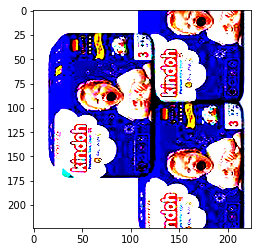

In [47]:
from PIL import Image
import  matplotlib.pyplot as plt
import numpy as np
img = data[6][3]
plt.imshow(np.transpose(img, (1, 2, 0)), interpolation='nearest')


In [50]:
data[3]

tensor([1, 1, 1, 1])

In [101]:
EfficientNet._blocks.require_grad = True

In [28]:
len(valset)

20120

In [92]:
EfficientNet._fc.require_grad = False

In [60]:
a = EfficientNet.parameters()

In [62]:
for j in a:
    j.requires_grad = False
    print(j)
    break

Parameter containing:
tensor([0.9874, 0.9504, 0.9693, 0.9989, 1.0303, 1.0369, 0.9973, 0.9875, 1.0172,
        1.0221, 1.0885, 1.0452, 1.0247, 0.9787, 1.0235, 0.9686, 1.0164, 1.0139,
        1.0174, 1.0422, 1.0137, 1.0294, 0.9907, 1.0024, 1.0165, 1.0584, 1.0431,
        1.0567, 1.0678, 1.0414, 0.9800, 1.0457])


In [55]:
for i in a:
    print(i)

In [63]:
EfficientNet.required_grad = False

In [78]:
new_dict= EfficientNet.state_dict()
for k, v in new_dict.items():
    print(k)
    '''if k.split('.')[0] =='_blocks' and k.split('.')[1] =='2':
        print(k)
        break'''

_conv_stem.weight
_bn0.weight
_bn0.bias
_bn0.running_mean
_bn0.running_var
_bn0.num_batches_tracked
_blocks.0._depthwise_conv.weight
_blocks.0._bn1.weight
_blocks.0._bn1.bias
_blocks.0._bn1.running_mean
_blocks.0._bn1.running_var
_blocks.0._bn1.num_batches_tracked
_blocks.0._se_reduce.weight
_blocks.0._se_reduce.bias
_blocks.0._se_expand.weight
_blocks.0._se_expand.bias
_blocks.0._project_conv.weight
_blocks.0._bn2.weight
_blocks.0._bn2.bias
_blocks.0._bn2.running_mean
_blocks.0._bn2.running_var
_blocks.0._bn2.num_batches_tracked
_blocks.1._expand_conv.weight
_blocks.1._bn0.weight
_blocks.1._bn0.bias
_blocks.1._bn0.running_mean
_blocks.1._bn0.running_var
_blocks.1._bn0.num_batches_tracked
_blocks.1._depthwise_conv.weight
_blocks.1._bn1.weight
_blocks.1._bn1.bias
_blocks.1._bn1.running_mean
_blocks.1._bn1.running_var
_blocks.1._bn1.num_batches_tracked
_blocks.1._se_reduce.weight
_blocks.1._se_reduce.bias
_blocks.1._se_expand.weight
_blocks.1._se_expand.bias
_blocks.1._project_conv.weigh

In [103]:
len(new_dict.keys())

360

In [1]:
from model.model import efficientnet

In [2]:
phi = 0
num_classes = 10
transfer = 'saved/models/fasion_efficientnet_b0_unsuper/model_10.pt'
block_num = 10
no_head = True

model = efficientnet(phi = phi, num_classes = num_classes, transfer = transfer, block_num = block_num, no_head=no_head)

load model weight from saved/models/fasion_efficientnet_b0_unsuper/model_10.pt


In [6]:
if 'hello':
    print(1)

1


In [5]:
from model.classifier import classifier_with_no_head_conv

In [6]:
model = classifier_with_no_head_conv.from_name('efficientnet-b0')

In [7]:
model(data[0])

tensor([[ 0.0030,  0.0209,  0.0784,  ..., -0.0699, -0.0136, -0.0007],
        [-0.2561,  0.5647,  0.2439,  ...,  0.2792, -0.0663, -0.4735],
        [-0.0237, -0.0662,  0.0016,  ..., -0.0044, -0.0248,  0.0784],
        ...,
        [-0.0085,  0.0145, -0.0034,  ..., -0.0081, -0.0874,  0.0876],
        [ 0.0144, -0.0799,  0.1315,  ..., -0.0136, -0.0983,  0.0705],
        [-0.0169, -0.0616,  0.1985,  ..., -0.0750, -0.0165,  0.0710]],
       grad_fn=<AddmmBackward>)

In [3]:
print(model)

classifier_with_no_head_conv(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 